# Exploratory Data Analysis

Dataset: [Yellow Taxi Trip Records - January 2018](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [1]:
import pandas as pd 
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_parquet('data/yellow_tripdata_2018-01.parquet')
data = raw_data.copy()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN


# Data Exploration

In [3]:
data.shape

(8760687, 19)

8760687 rows and 19 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
data.isna().sum() #missing values

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     8760675
airport_fee              8760675
dtype: int64

`congestion_surcharge`: total amount collected in trip for NYS congestion surcharge. <br>
`airport_fee`: only for pick ups at LaGuardia and John F. Kennedy Airports.

In [6]:
data.fillna(0, inplace=True) #filling missing values

In [7]:
data.nunique() #distinct elements

VendorID                       2
tpep_pickup_datetime     2311532
tpep_dropoff_datetime    2315089
passenger_count               10
trip_distance               4397
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 259
DOLocationID                 261
payment_type                   4
fare_amount                 1714
extra                         42
mta_tax                       15
tip_amount                  3397
tolls_amount                 967
improvement_surcharge          4
total_amount               11514
congestion_surcharge           2
airport_fee                    1
dtype: int64

Adding new features to gain more insights from the data.

In [8]:
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['trip_duration_sec'] = data['trip_duration'].dt.total_seconds()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_sec
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0 days 00:03:18,198.0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,0.0,0.0,0 days 00:18:10,1090.0
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,0.0,0.0,0 days 00:05:55,355.0
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,0.0,0.0,0 days 00:32:29,1949.0
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,0.0,0.0,0 days 00:17:48,1068.0


In [9]:
data.describe() #statistical summary

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_sec
count,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8760687.0,8760687,8.760687e+06
mean,1.560978e+00,1.606807e+00,2.804022e+00,1.039545e+00,1.644579e+02,1.627270e+02,1.310613e+00,1.224443e+01,3.246882e-01,4.975066e-01,1.818759e+00,3.026157e-01,2.996307e-01,1.549109e+01,3.424389e-06,0.0,0 days 00:15:39.716949595,9.397169e+02
std,4.962678e-01,1.258420e+00,6.412050e+01,4.450619e-01,6.635990e+01,7.031145e+01,4.817808e-01,1.168321e+01,4.502555e-01,4.333281e-02,2.486375e+00,1.738184e+00,1.442748e-02,1.419546e+01,2.925912e-03,0.0,0 days 01:00:20.464311806,3.620464e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02,0.000000e+00,0.0,-4 days +00:48:25,-3.426950e+05
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0.000000e+00,0.0,0 days 00:06:14,3.740000e+02
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01,0.000000e+00,0.0,0 days 00:10:22,6.220000e+02
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01,0.000000e+00,0.0,0 days 00:16:50,1.010000e+03
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03,2.500000e+00,0.0,3 days 17:42:04,3.229240e+05


Findings:
- There are 2 unique `VendorID`.
- There are 9 unique `passenger_count` and a minimum of 0. CHECK
- The minimum `trip_distance` is 0 and the maximum is 189483.8 km. CHECK
- `RatecodeID` goes from 1 to 99. It's only supposed to be 6. CHECK
- `PULocationID` and `DOLocationID` goes from 1 to 265.
- There are 4 `payment_type`.
- `fare_amount` is the target value for the ML model. CHECK 
- From `extra` to `total_amount` have negative values. CHECK
- `congestion_surcharge` has a unique value of 2.5. 
- There are no values in `airport_fee`. 
- `trip_duration` has negative values. CHECK

# Handling Outliers

### Passenger count

In [10]:
data.passenger_count.value_counts()

1    6249564
2    1271678
5     414473
3     351928
6     250115
4     163572
0      59269
7         39
9         25
8         24
Name: passenger_count, dtype: int64

The maximum amount of passengers allowed in a yellow taxicab by law is four in a 4 passenger taxicab or five passengers in a 5 passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven. And there cannot be a trip with 0 passengers.

https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

In [11]:
data = data[(data['passenger_count'] != 0) & (data['passenger_count'] <= 6)] #data filter 

<AxesSubplot:xlabel='passenger_count'>

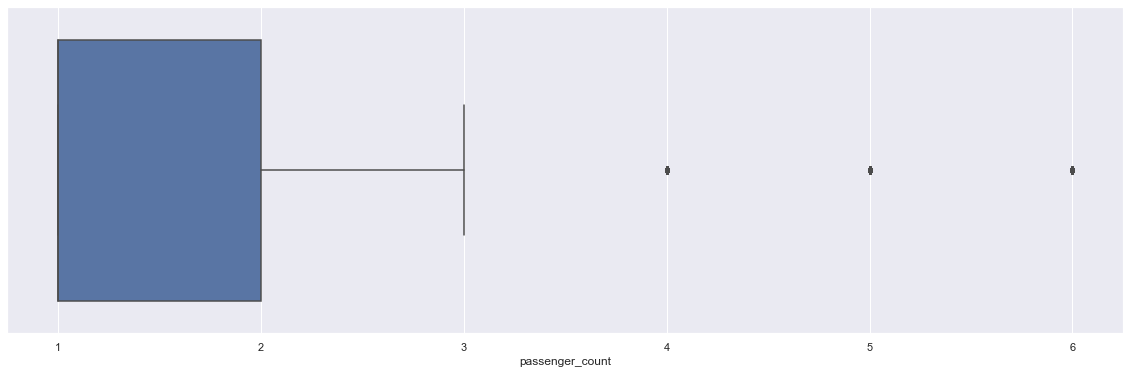

In [12]:
plt.figure(figsize=(20,6))
sns.boxplot(data['passenger_count'])

### Trip distance

In [13]:
data['trip_distance'].value_counts().sort_index()

0.00         54383
0.01          2656
0.02          1960
0.03          1654
0.04          1355
             ...  
132.61           1
252.10           1
267.70           1
484.91           1
189483.84        1
Name: trip_distance, Length: 4392, dtype: int64

There are 54383 trips with 0 km distance. It could be that dropoff location couldn’t be tracked or the passenger canceled the trip.

Also a 189483.84 km trip, that's an outlier!

In [14]:
data.drop(data[data['trip_distance'] == 0].index, inplace=True)

In [15]:
data.drop(data[data['trip_distance'] == 189483.84].index, inplace=True)

<AxesSubplot:xlabel='trip_distance'>

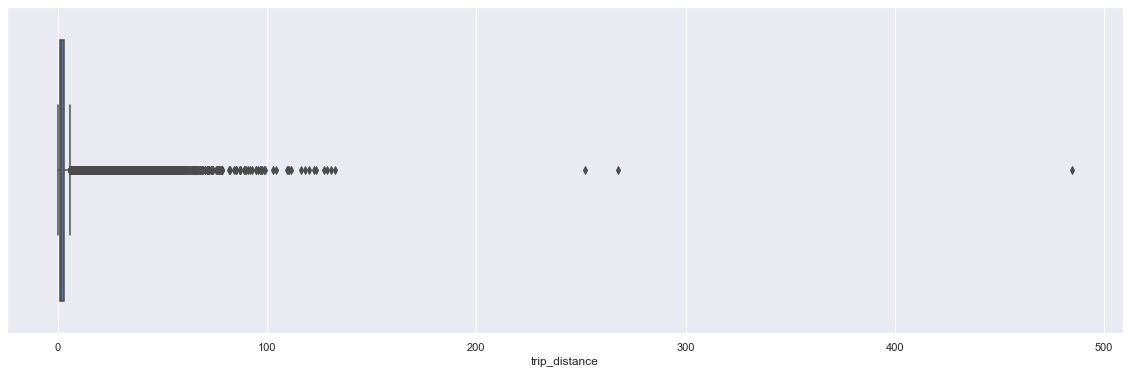

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(data['trip_distance'])

In [17]:
data.loc[:,'trip_distance':].loc[data.trip_distance > 200] 

,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_sec
867229,252.10,5,N,124,265,3,700.0,0.0,0.0,0.0,30.02,0.3,730.32,0.0,0.0,0 days 04:44:37,17077.0
1393189,267.70,5,N,132,265,2,950.0,0.0,0.0,0.0,0.00,0.3,950.30,0.0,0.0,0 days 05:08:39,18519.0
2994332,484.91,4,N,132,265,2,2409.0,1.0,0.5,0.0,7.01,0.3,2417.81,0.0,0.0,0 days 11:14:33,40473.0


According to the rate code, two of them are negotiated fares and the other one was a trip to the airport. We won't count them as outliers.

### Rate code ID

In [18]:
data.RatecodeID.value_counts()

1     8442816
2      171456
3       14414
5       13283
4        4950
6          23
99          4
Name: RatecodeID, dtype: int64

In the dictionary, the rate code goes from 1 to 6.

In [19]:
data.drop(data.loc[data['RatecodeID'] == 99].index, inplace=True)

### Fare amount

This will be the target value for the machine learning model.

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

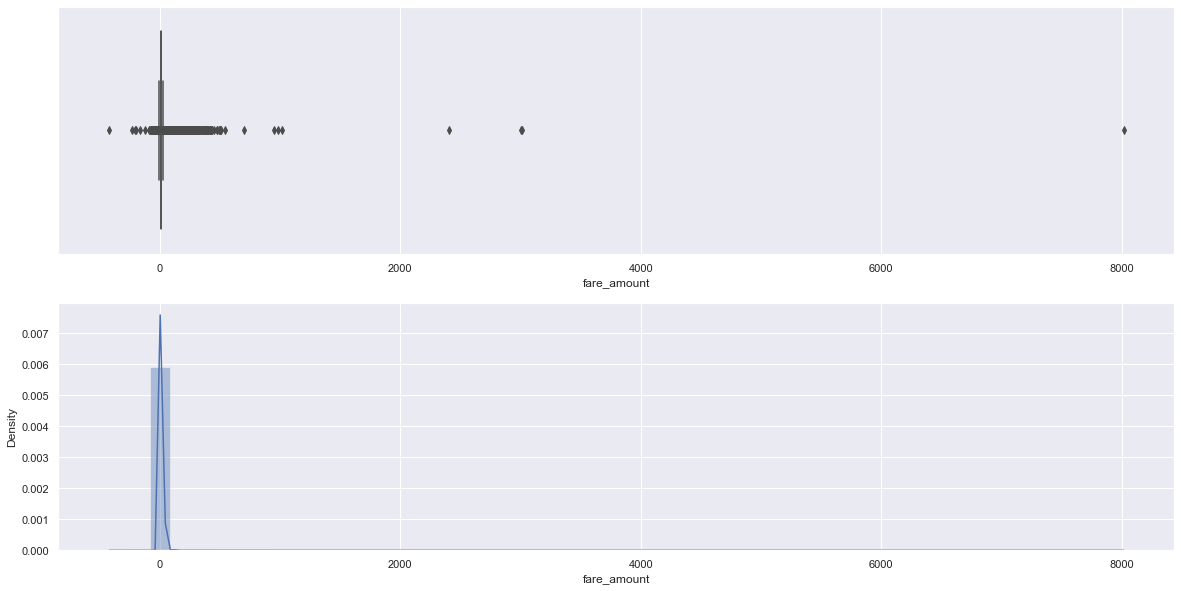

In [20]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.boxplot(data['fare_amount'], ax=axes[0])
sns.distplot(data['fare_amount'], ax=axes[1])

In [21]:
print(f"Negative fares: {len(data[data['fare_amount'] < 0])}")
print(f"$0 fares: {len(data[data['fare_amount'] == 0])}")
print(f"Fares greater than $100: {len(data[data['fare_amount'] > 100])}")

Negative fares: 3436
$0 fares: 1053
Fares greater than $100: 4330


The minimum fare amount appears to be $2.50, based on this [discussion](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/discussion/63319), so any values less than this amount will not be considered for the ML model. That also applies to any fares greater than $100, since there's a limited number outside this bounds.

In [22]:
data = data.loc[data['fare_amount'].between(left = 2.5, right = 100)]

Text(0.5, 0, 'Fare Amount ($)')

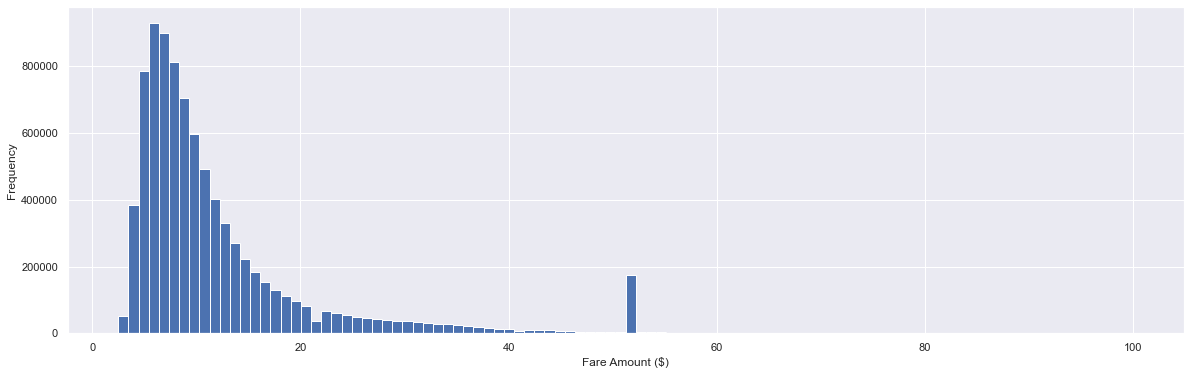

In [23]:
plt.figure(figsize=(20,6))
data.fare_amount.hist(bins=100)
plt.ylabel('Frequency') 
plt.xlabel('Fare Amount ($)')

`Looks like a peak aprox $55!`

<AxesSubplot:xlabel='fare_amount', ylabel='Proportion'>

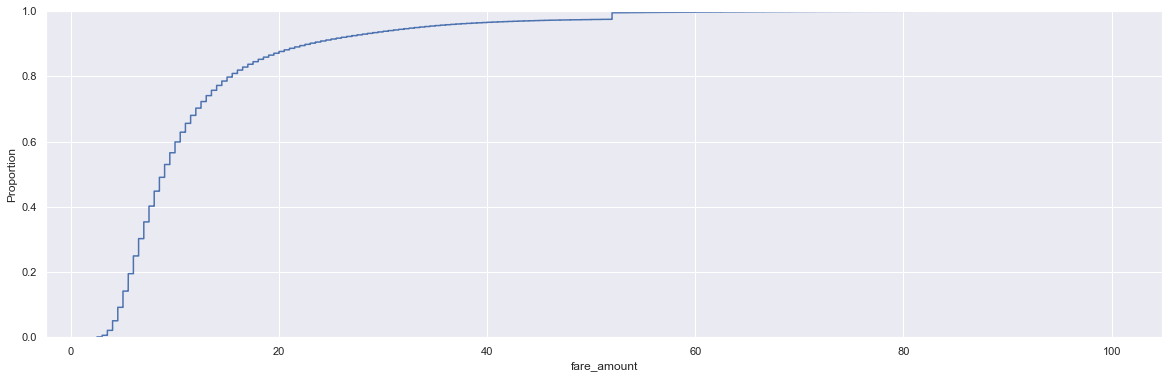

In [24]:
plt.figure(figsize=(20,6))
sns.ecdfplot(data['fare_amount'])

Almost 90% of the fares are below $20, with a heavy right tail of larger fares.

### Extra : Total amount

<AxesSubplot:xlabel='total_amount'>

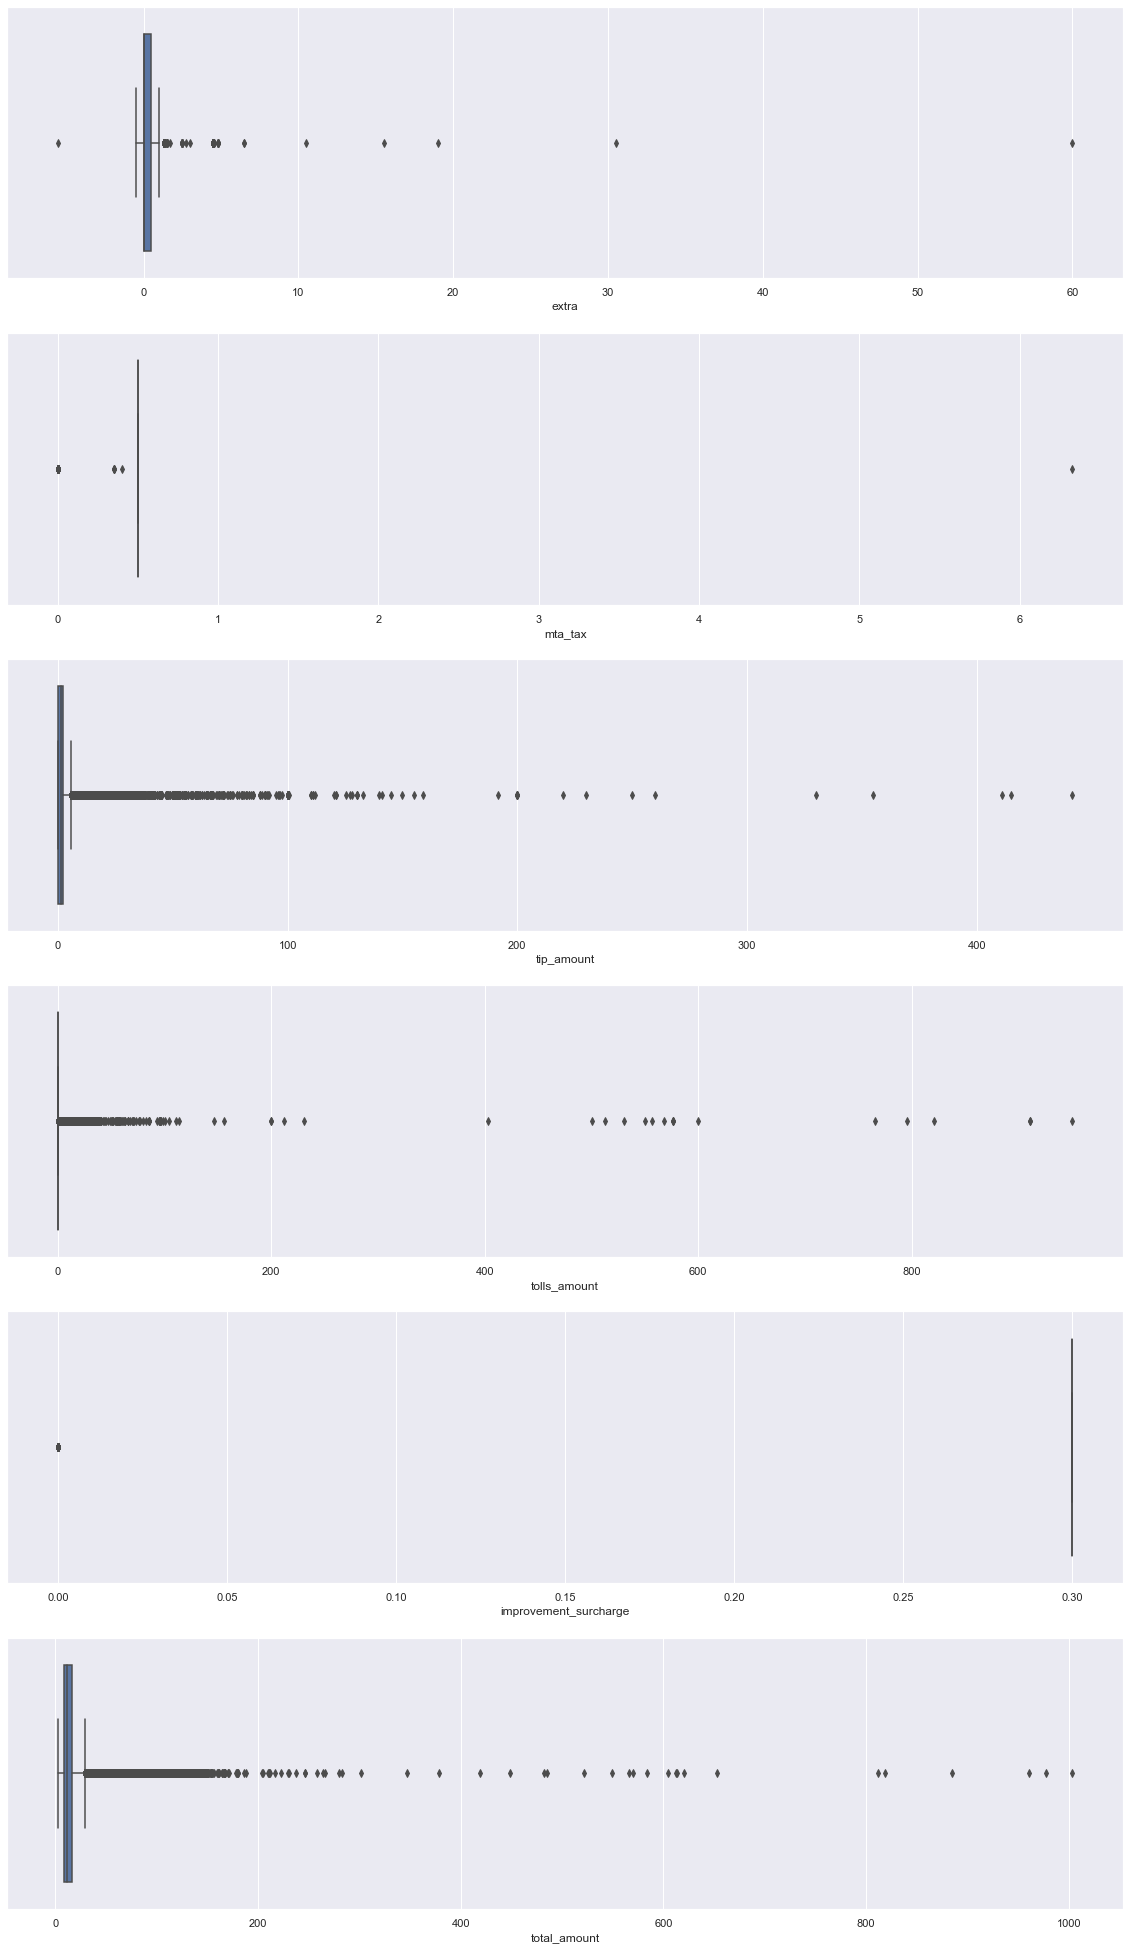

In [25]:
fig, axes = plt.subplots(6,1, figsize=(20,35))
sns.boxplot(data['extra'], ax=axes[0])
sns.boxplot(data['mta_tax'], ax=axes[1])
sns.boxplot(data['tip_amount'], ax=axes[2])
sns.boxplot(data['tolls_amount'], ax=axes[3])
sns.boxplot(data['improvement_surcharge'], ax=axes[4])
sns.boxplot(data['total_amount'], ax=axes[5])

In [26]:
(data.loc[:,'extra':'total_amount'] < 0).sum() #negative values

extra                    8
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [27]:
data.drop(data[data['extra'] < 0].index, inplace=True) #dropping negative values

### Trip duration

<AxesSubplot:xlabel='trip_duration_sec'>

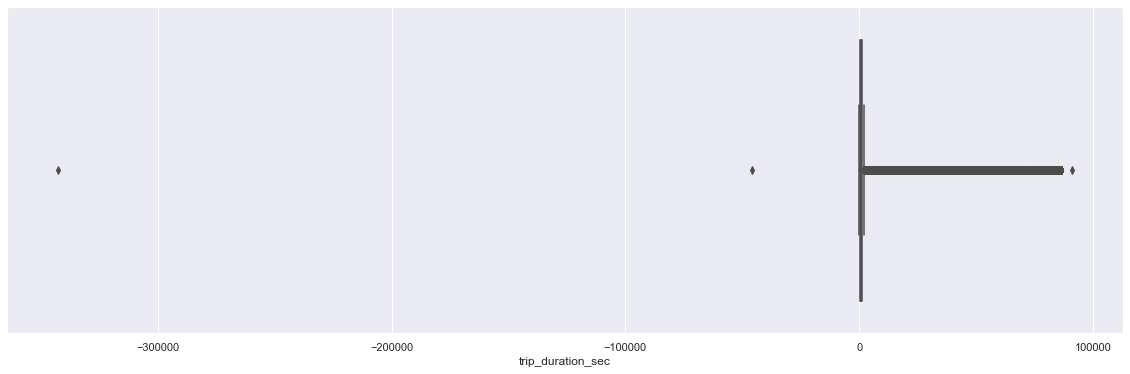

In [28]:
plt.figure(figsize=(20,6))
sns.boxplot(data['trip_duration_sec'])

In [29]:
print(f"Negatives: {len(data[data['trip_duration_sec'] < 0])}")
print(f"Zeros: {len(data[data['trip_duration_sec'] == 0])}")
print(f">10000: {len(data[data['trip_duration_sec'] > 43200])}") #12hrs max

Negatives: 2
Zeros: 215
>10000: 15762


In [30]:
data[data['trip_duration_sec'] < 0] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_sec
158888,1,2018-01-01 15:15:13,2017-12-28 16:03:38,1,3.3,1,N,209,137,1,...,0.5,0.5,2.85,0.00,0.3,17.15,0.0,0.0,-4 days +00:48:25,-342695.0
6146145,1,2018-01-23 13:12:19,2018-01-23 00:28:25,2,20.9,2,N,132,244,2,...,0.0,0.5,0.00,5.76,0.3,58.56,0.0,0.0,-1 days +11:16:06,-45834.0


In [31]:
data.drop(data[data['trip_duration_sec'] < 0].index, inplace=True) #dropping negative values

In [32]:
data.drop(data[data['trip_duration_sec'] == 0].index, inplace=True) #dropping trip with no duration time

In [33]:
data.drop(data[data['trip_duration_sec'] > 43200].index, inplace=True) #dropping 

<AxesSubplot:xlabel='trip_duration_sec', ylabel='Density'>

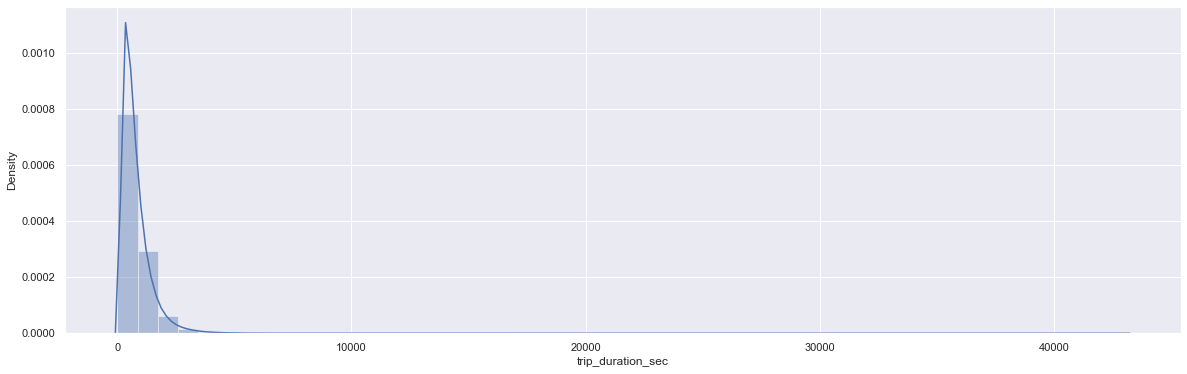

In [34]:
plt.figure(figsize=(20,6))
sns.distplot(data['trip_duration_sec'])

<AxesSubplot:xlabel='trip_duration_sec', ylabel='Proportion'>

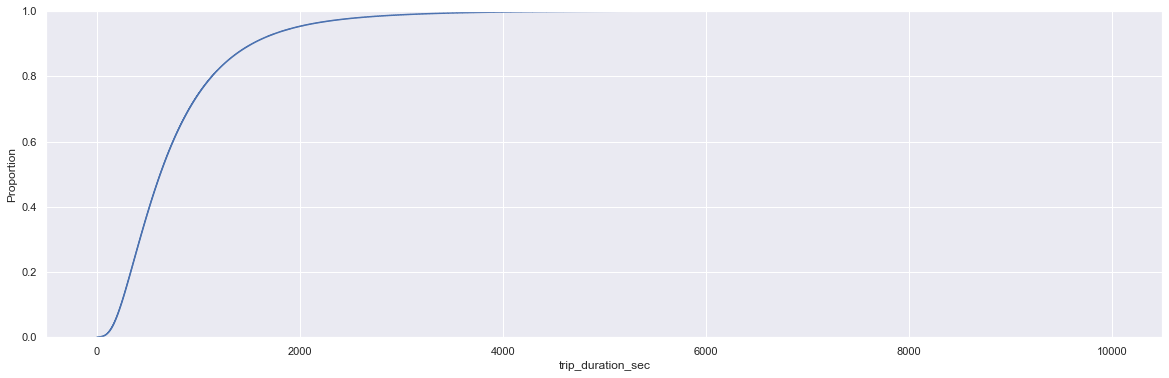

In [35]:
plt.figure(figsize=(20,6))
sns.ecdfplot(data.loc[data['trip_duration_sec'] < 10000]['trip_duration_sec'])

Most trips last less than 33 minutes.

### Final count

In [36]:
raw_data.shape

(8760687, 19)

In [37]:
data.shape

(8621735, 21)

In [38]:
print(str(round(data.shape[0] * 100 / raw_data.shape[0], 2))+'%')

98.41%


# Data Visualization

### Passenger count per trip

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

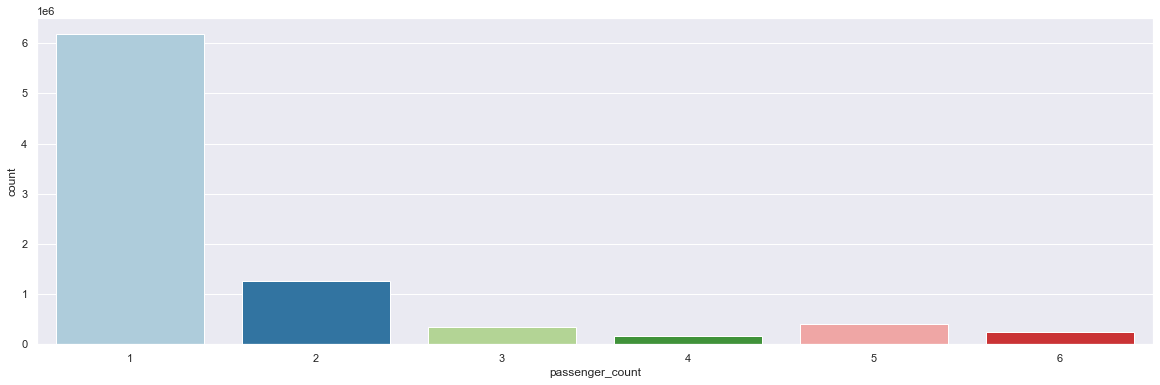

In [39]:
plt.figure(figsize=(20,6))
sns.set_palette("Paired")
sns.countplot(data.passenger_count)

### Trips per day

In [40]:
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['tpep_dropoff_datetime'].dt.day_name()
data['pickup_day_no'] = data['tpep_pickup_datetime'].dt.weekday
data['dropoff_day_no'] = data['tpep_dropoff_datetime'].dt.weekday
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month

In [41]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [42]:
data['pickup_timeofday'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(time_of_day)

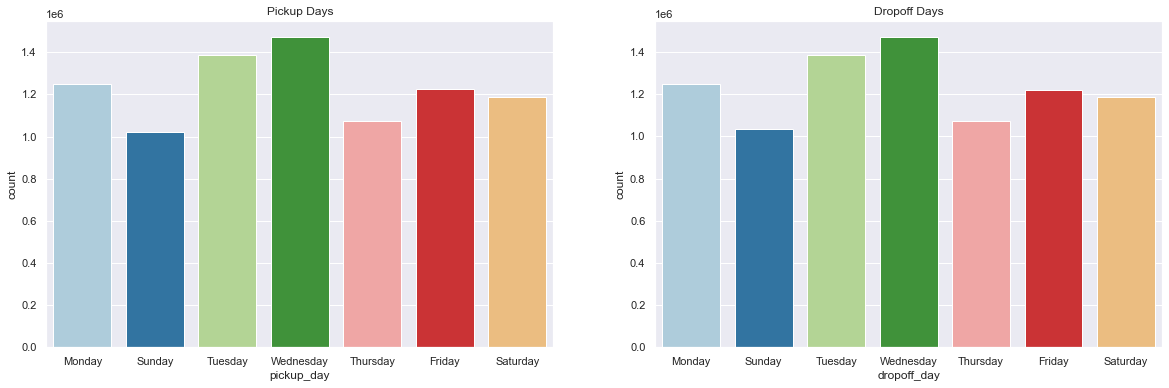

In [43]:
figure,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (20,6))
sns.set_palette("Paired")
ax1.set_title('Pickup Days')
ax = sns.countplot(x = "pickup_day",data = data,ax = ax1)
ax2.set_title('Dropoff Days')
ax = sns.countplot(x = "dropoff_day",data = data,ax = ax2)

### Trips per hour

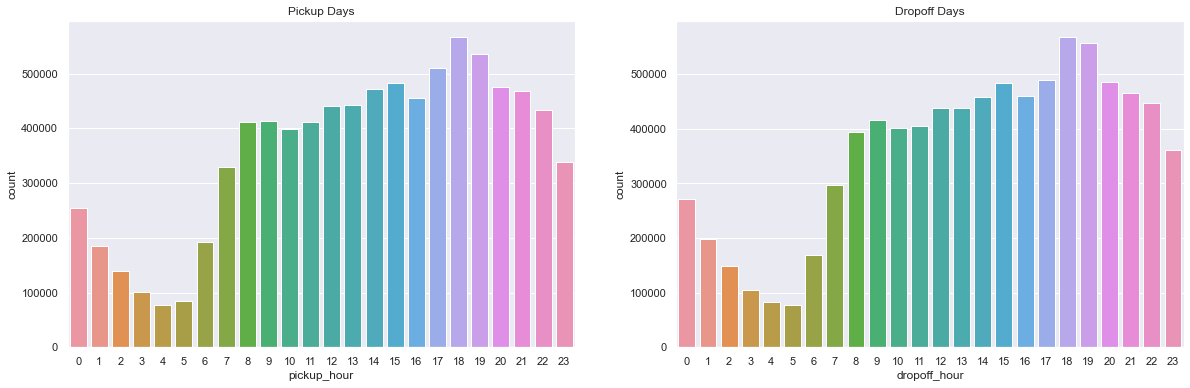

In [44]:
figure,(ax9,ax10) = plt.subplots(ncols = 2,figsize = (20,6))
ax9.set_title('Pickup Days')
ax = sns.countplot(x = "pickup_hour",data = data,ax = ax9)
ax10.set_title('Dropoff Days')
ax = sns.countplot(x = "dropoff_hour",data = data,ax = ax10)

### Trips per time of day

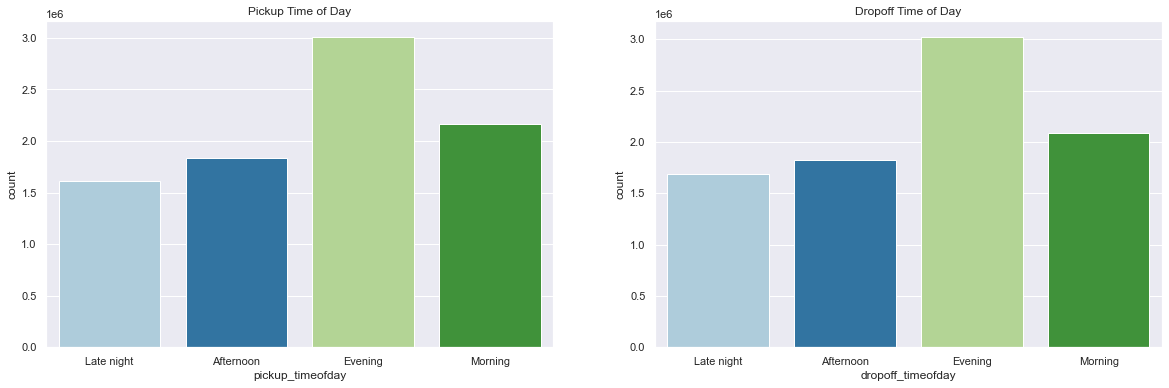

In [45]:
figure,(ax3,ax4) = plt.subplots(ncols = 2,figsize = (20,6))
sns.set_palette("Paired")
ax3.set_title('Pickup Time of Day')
ax = sns.countplot(x = "pickup_timeofday",data = data,ax = ax3)
ax4.set_title('Dropoff Time of Day')
ax = sns.countplot(x = "dropoff_timeofday",data = data,ax = ax4)

### Boroughs and Zones

In [46]:
taxi_zone = pd.read_csv('data/taxi_zone_lookup.csv')
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [47]:
taxi_zone.drop(taxi_zone.index[[263,264]], inplace=True) #dropping Unknown variable

In [48]:
data_zone = data.merge(taxi_zone, left_on='PULocationID', right_on='LocationID')
data_zone.drop(['LocationID','service_zone'], axis=1, inplace=True)
data_zone.rename(columns={"Borough": "PUBorough", "Zone": "PUZone"}, inplace=True)

boroughs_list = ['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
data_zone = data_zone[data_zone['PUBorough'].isin(boroughs_list)]

data_zone = data_zone.merge(taxi_zone, left_on='DOLocationID', right_on='LocationID')
data_zone.drop(['LocationID','service_zone'], axis=1, inplace=True)
data_zone.rename(columns={"Borough": "DOBorough", "Zone": "DOZone"}, inplace=True)

In [49]:
data_zone_counts = data_zone.loc[:,['PUBorough','PUZone']].groupby(['PUBorough','PUZone']).value_counts()
data_zone_counts = pd.DataFrame(data_zone_counts)
data_zone_counts.reset_index(inplace=True)
data_zone_counts.rename(columns={0:'counts'}, inplace=True)
data_zone_counts

,PUBorough,PUZone,counts
0,Bronx,Allerton/Pelham Gardens,36
1,Bronx,Bedford Park,94
2,Bronx,Belmont,43
3,Bronx,Bronx Park,19
4,Bronx,Bronxdale,40
...,...,...,...
247,Staten Island,Saint George/New Brighton,5
248,Staten Island,South Beach/Dongan Hills,3
249,Staten Island,Stapleton,1
250,Staten Island,West Brighton,2


In [50]:
fig = px.treemap(
    data_zone_counts,
    path=["PUBorough","PUZone"],
    values='counts',
    title='Boroughs and Zones')
fig.show()

### Trips per borough

In [51]:
data_zone_trips = data_zone.groupby('PUBorough')['PUBorough'].count().sort_values(ascending=False)
data_zone_trips

PUBorough
Manhattan        7858161
Queens            500581
Brooklyn           97304
Bronx               6480
Staten Island        103
Name: PUBorough, dtype: int64

In [52]:
fig = px.bar(data_zone_trips, 
            x=data_zone_trips.index, 
            y=data_zone_trips.values,
            labels={'index':'boroughs', 'y':'count'}, 
            title='Trips per boroughs')
fig.show()

### Trips inter and intra boroughs

In [53]:
data_zone['borough_type'] = (data_zone['PUBorough'] == data_zone['DOBorough']).map({True: 'Intra', False: 'Inter'})  

In [54]:
df_data_zone = pd.DataFrame(data_zone.groupby('PUBorough')['borough_type'].value_counts())
df_data_zone.rename(columns={'borough_type':'counts'}, inplace=True)
df_data_zone.reset_index(level=1, inplace=True)
df_data_zone

,borough_type,counts
PUBorough,,
Bronx,Intra,4346
Bronx,Inter,2134
Brooklyn,Intra,65032
Brooklyn,Inter,32272
Manhattan,Intra,7350006
Manhattan,Inter,508155
Queens,Inter,374323
Queens,Intra,126258
Staten Island,Intra,88


In [55]:
fig = px.bar(df_data_zone, x=df_data_zone.index, y='counts',
                    color='borough_type', barmode='group',
                    title='Trips per inter and intra boroughs')
fig.show()

### Trips per zone

In [56]:
gby_zone_borough=data_zone.groupby(['PUZone','PUBorough'])
data_zone_counts=gby_zone_borough['PUZone'].count().sort_values(ascending=False).rename("count")
data_zone_counts=data_zone_counts.reset_index()
data_zone_counts

,PUZone,PUBorough,count
0,Upper East Side South,Manhattan,356979
1,Midtown Center,Manhattan,350332
2,Upper East Side North,Manhattan,342040
3,Midtown East,Manhattan,304477
4,Times Sq/Theatre District,Manhattan,304295
...,...,...,...
247,Mariners Harbor,Staten Island,2
248,City Island,Bronx,1
249,Stapleton,Staten Island,1
250,Port Richmond,Staten Island,1


In [57]:
fig = px.bar(data_zone_counts[0:20], x='PUZone', y='count',color="PUBorough", title='Trips per zone')
fig.show()

### Trips per payment type

In [58]:
data_payment_type = pd.DataFrame(data.payment_type.value_counts())
data_payment_type.columns=['counts']
data_payment_type.index = ['Credit card', 'Cash', 'No charge', 'Dispute']
data_payment_type

,counts
Credit card,6029381
Cash,2550815
No charge,32371
Dispute,9168


In [59]:
fig = px.bar(data_payment_type, x=data_payment_type.index, y='counts',
            labels={'index':'payment_type'}, title='Trips per payment type')
fig.show()

### Avg tip per passenger count

This field is auto populates for credit card tips.

In [60]:
data_tips = data.copy()
data_tips = data_tips[data_tips['payment_type']==1] 

In [61]:
data_tips_avg = data_tips.groupby('passenger_count')['tip_amount'].mean()
data_tips_avg = pd.DataFrame(data_tips_avg)
data_tips_avg

,tip_amount
passenger_count,
1,2.567893
2,2.643340
3,2.601794
4,2.603258
5,2.605471
6,2.600890


In [62]:
fig = px.bar(data_tips_avg, x=data_tips_avg.index, y='tip_amount',
            labels={'index':'passenger_count','tip_amount':'avg_tip_amount'}, title='Trips per tip amount')
fig.show()

In [63]:
bins = [0, 5, 10, 20, 50, 100, 450]
data_bins = pd.DataFrame(pd.cut(data_tips['tip_amount'], bins))
data_bins.columns = ['bins']
data_tip_bins = data_tips.merge(data_bins, left_on=data_tips.index, right_on=data_bins.index)
data_tip_bins = data_tip_bins.groupby('bins')['tip_amount'].count() 
data_tip_bins = data_tip_bins.reset_index()
data_tip_bins['bins'] = data_tip_bins['bins'].values.astype('string')
data_tip_bins

,bins,tip_amount
0,"(0, 5]",5244481
1,"(5, 10]",402433
2,"(10, 20]",145777
3,"(20, 50]",3388
4,"(50, 100]",222
5,"(100, 450]",37


In [64]:
fig = px.bar(data_tip_bins, x='bins', y='tip_amount',
            labels={'bins':'tip($)', 'tip_amount':'count'}, title='Tip range per ride')
fig.show()

## Trips per rate code

In [65]:
data_rate = data.groupby('RatecodeID')['fare_amount'].count()
data_rate.index = 'Standard rate', 'JFK', 'Newark', 'Nassau or Westchester', 'Negotiated fare', 'Group ride' 
data_rate

Standard rate            8424090
JFK                       170612
Newark                     13833
Nassau or Westchester       4001
Negotiated fare             9177
Group ride                    22
Name: fare_amount, dtype: int64

In [66]:
fig = px.bar(data_frame=data_rate, x=data_rate.index, y=data_rate.values,
            labels={'index':'rate_code', 'y':'counts'}, title='Trips per rate code')
fig.show()